## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on='Mouse ID')
# Display the data table for preview
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_dups = combined_df.loc[combined_df.duplicated(['Mouse ID','Timepoint'],keep=False)]
df_dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
df_dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# MEAN
tumor_vol_mean = clean_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].mean()
tumor_vol_mean


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [7]:
# MEDIAN
tumor_vol_median = clean_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].median()
tumor_vol_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# VARIANCE
tumor_vol_variance = clean_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].var()
tumor_vol_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# STANDARD DEVIATION
tumor_vol_std = clean_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].std()
tumor_vol_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# STANDARD ERROR OF THE MEAN (SEM)
tumor_vol_sem = clean_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].sem()
tumor_vol_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [11]:
type(tumor_vol_sem)

pandas.core.series.Series

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

d = {"Mean":tumor_vol_mean,"Median":tumor_vol_median,"Variance":tumor_vol_variance,"Std Dev":tumor_vol_std,\
    "SEM":tumor_vol_sem}
summ_stats_df = pd.DataFrame(d)
summ_stats_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a df of "describe()" statistics of the tumor volume for each regimen
# This method produces everything in a single groupby function (not requested for homework, just wanted to see)
tumor_vol_stats = clean_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].describe().reset_index()
tumor_vol_stats

,Drug Regimen,count,mean,std,min,25%,50%,75%,max
0,Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
1,Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
2,Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
3,Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
4,Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
5,Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
6,Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
7,Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
8,Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690
9,Zoniferol,182.0,53.236507,6.966589,45.000000,47.337876,51.818479,57.954259,73.324432


In [15]:
type(tumor_vol_stats)

pandas.core.frame.DataFrame

## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
num_mice_per_drug = clean_df['Drug Regimen'].value_counts().reset_index()
num_mice_per_drug


,index,Drug Regimen
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,156


In [17]:
type(num_mice_per_drug)

pandas.core.frame.DataFrame

In [18]:
num_mice_per_drug.columns = ['Drug Regimen','Number of Mice']
num_mice_per_drug

,Drug Regimen,Number of Mice
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,156


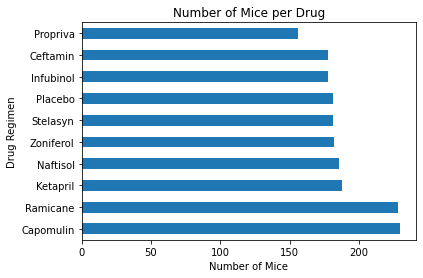

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plot01 = num_mice_per_drug.plot.barh(x='Drug Regimen',y='Number of Mice',legend=False,title="Number of Mice per Drug")
plot01.set(xlabel = "Number of Mice")
figsize=[6.0,4.8]


In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Generate a Matplotlib bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
list_y = num_mice_per_drug['Drug Regimen'].tolist()
list_y


['Capomulin',
 'Ramicane',
 'Ketapril',
 'Naftisol',
 'Zoniferol',
 'Stelasyn',
 'Placebo',
 'Infubinol',
 'Ceftamin',
 'Propriva']

In [21]:
# Create an array that contains the number of mice for each drug regimen
list_x = num_mice_per_drug['Number of Mice'].tolist()
list_x

[230, 228, 188, 186, 182, 181, 181, 178, 178, 156]

Text(0.5, 1.0, 'Number of Mice per Drug')

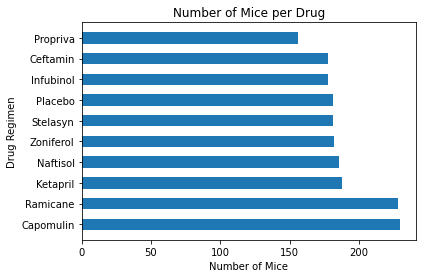

In [22]:
# Tell Matplotlib to make a horizontal bar chart with list_y(drugs) as y-axis and x_axis (number of mice) as x_axis
bar_width = 0.55
plt.barh(list_y,list_x,bar_width)
figsize=[6.0,4.8]
plt.xlabel('Number of Mice')
plt.ylabel('Drug Regimen')
plt.title('Number of Mice per Drug')

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
